In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('car_data.csv')

In [8]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [24]:
car_df = df[['make','fuel-type','body-style','horsepower','city-mpg','price']]

In [25]:
car_df

,make,fuel-type,body-style,horsepower,city-mpg,price
0,alfa-romero,gas,convertible,111,21,13495
1,alfa-romero,gas,convertible,111,21,16500
2,alfa-romero,gas,hatchback,154,19,16500
3,audi,gas,sedan,102,24,13950
4,audi,gas,sedan,115,18,17450
...,...,...,...,...,...,...
200,volvo,gas,sedan,114,23,16845
201,volvo,gas,sedan,160,19,19045
202,volvo,gas,sedan,134,18,21485
203,volvo,diesel,sedan,106,26,22470


In [4]:
import sqlite3
conn = sqlite3.connect('cars.db')

In [27]:
car_df.rename(columns={'fuel-type' : 'fueltype', 'body-style' : 'bodystyle', 'city-mpg' : 'citympg'},inplace=True)

In [28]:
car_df

,make,fueltype,bodystyle,horsepower,citympg,price
0,alfa-romero,gas,convertible,111,21,13495
1,alfa-romero,gas,convertible,111,21,16500
2,alfa-romero,gas,hatchback,154,19,16500
3,audi,gas,sedan,102,24,13950
4,audi,gas,sedan,115,18,17450
...,...,...,...,...,...,...
200,volvo,gas,sedan,114,23,16845
201,volvo,gas,sedan,160,19,19045
202,volvo,gas,sedan,134,18,21485
203,volvo,diesel,sedan,106,26,22470


In [29]:
car_df.to_sql('post', conn, if_exists='replace', index=False)

In [5]:
df = pd.read_csv('car_data.csv')
car_df = df[['make','fuel-type','body-style','horsepower','city-mpg','price']]
car_df.rename(columns={'fuel-type' : 'fueltype', 'body-style' : 'bodystyle', 'city-mpg' : 'citympg'},inplace=True)
conn = sqlite3.connect('cars.db')
car_df.to_sql('post', conn, if_exists='append', index=False)

In [6]:
pwd

'/Users/adityatiwari/Desktop/Python/MyPractice/flask_blog/flaskblog'

In [1]:
import pandas as pd

In [41]:
import sqlite3
conn = sqlite3.connect('/Users/adityatiwari/Desktop/Python/MyPractice/flask_blog/flaskblog/cars.db')
pdf = pd.read_sql_query('Select * from post',conn)
pdf.replace('?',0,inplace=True)

In [42]:
pdf

,id,make,fueltype,bodystyle,horsepower,citympg,price
0,1,alfa-romero,gas,convertible,111,21,13495
1,2,alfa-romero,gas,convertible,111,21,16500
2,3,alfa-romero,gas,hatchback,154,19,16500
3,4,audi,gas,sedan,102,24,13950
4,5,audi,gas,sedan,115,18,17450
...,...,...,...,...,...,...,...
200,201,volvo,gas,sedan,114,23,16845
201,202,volvo,gas,sedan,160,19,19045
202,203,volvo,gas,sedan,134,18,21485
203,204,volvo,diesel,sedan,106,26,22470


In [43]:
round(pdf['price'].mean())

12949.0

In [20]:
maxprice_car = pdf[pdf.price == pdf.price.max()]

In [35]:
maxprice_car['make'].values[0]

'Bently'

In [36]:
pdf['make'].value_counts()

Maruti     1
Bently     1
Mclaren    1
Name: make, dtype: int64

Text(0, 0.5, 'No. of Cars')

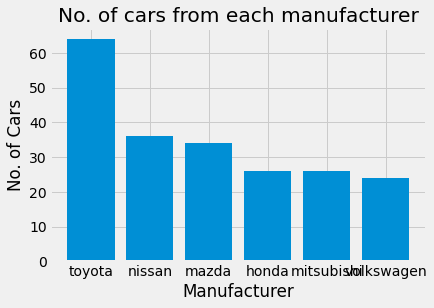

In [1]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt

conn = sqlite3.connect('cars.db')
pdf = pd.read_sql_query('Select * from post',conn)
maxprice_car = pdf[pdf.price == pdf.price.max()]
mean_price = round(pdf['price'].mean())

car_manf = []
no_cars = []

car_cnt = pdf['make'].value_counts().to_dict()

for key,value in car_cnt.items():
    car_manf.append(key)
    no_cars.append(value)

plt.style.use('fivethirtyeight')


plt.bar(car_manf[:6],no_cars[:6])
plt.title('No. of cars from each manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('No. of Cars')

Text(0.5, 1.0, 'No. of cars from each manufacturer')

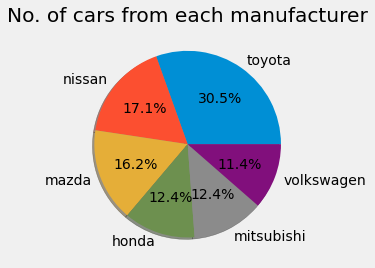

In [2]:
plt.pie(no_cars[:6],labels=car_manf[:6],shadow=True,autopct='%1.1f%%')
plt.title('No. of cars from each manufacturer')

In [3]:
pdf

,id,make,fueltype,bodystyle,horsepower,citympg,price
0,1,alfa-romero,gas,convertible,111,21,13495
1,2,alfa-romero,gas,convertible,111,21,16500
2,3,alfa-romero,gas,hatchback,154,19,16500
3,4,audi,gas,sedan,102,24,13950
4,5,audi,gas,sedan,115,18,17450
...,...,...,...,...,...,...,...
405,406,volvo,gas,sedan,114,23,16845
406,407,volvo,gas,sedan,160,19,19045
407,408,volvo,gas,sedan,134,18,21485
408,409,volvo,diesel,sedan,106,26,22470


In [4]:
body_cnt = pdf['bodystyle'].value_counts().to_dict()

In [5]:
body_cnt

{'sedan': 192, 'hatchback': 140, 'wagon': 50, 'hardtop': 16, 'convertible': 12}